## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat{y_i})^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [3]:
from sklearn.datasets import load_boston
import random

data = load_boston()
X_rm = data['data'][:, 5]
Y = data['target']

In [ ]:
# %%time
learning_rate = random.random() / 10000
theta_1 = random.random() * 200 - 100
theta_0 = random.random() * 200 - 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.abs(Y - y_hat)) / len(Y)
    
    if min_loss > current_loss:
        difference = min_loss - current_loss
        if update_count % 5000 == 0:
            print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}")            
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * np.sum(X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * np.sum(X_rm) / len(Y)
    
    if difference <= 0.0001:
        flag = 0
print(f"{update_count} iterations to get best theta with theta_1 = {theta_1} theta_0 = {theta_0}")

17.913586144567148 -89.17956299119737


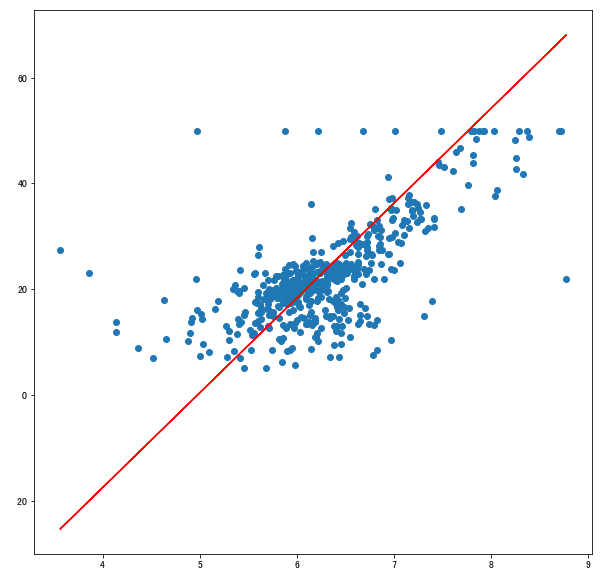

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

### Part 3: Finish the Solution Parse Part of Edit-Distance

### 3.1 Edit distance with matrix table

In [1]:
import numpy as np

In [1]:
class EditDistance:
    def __init__(self):
        self.solution = {}
    @staticmethod
    def edit_distance_with_matrix(str1, str2):
        len_1, len_2 = len(str1) + 1, len(str2) + 1
        if str1 and str2:
            matrix = np.zeros((len_2, len_1), dtype=np.int)
            matrix[0, :] = np.arange(len_1)
            matrix[:, 0] = np.arange(len_2)
            for i, char1 in enumerate(str2):
                for j, char2 in enumerate(str1):
                    if char1 == char2:
                        matrix[i + 1, j + 1] = matrix[i, j]
                    else:
                        matrix[i + 1, j + 1] = min(matrix[i, j + 1], matrix[i, j], matrix[i + 1, j]) + 1

            return matrix[len_2 -1 , len_1 - 1], matrix
        else:
            return len_1 -1  if str1 else len_2 - 1
    
    def get_matrix_solution(self, matrix):
        """
        Up refers to insert; left refers to delete; digonal refers to substating.
        """
        r, c = matrix.shape
        if r < 2:
            for _ in matrix[0, :c-1]:
                self.solution[_+1] = f"delete str1.({_})"
            return
        elif c < 2:
            for _ in matrix[:r-1, 0]:
                self.solution[_ + 1] = f"str1.({0}) + str2.({_})"
            return

        row, column = np.array(matrix.shape) - 1
        target = matrix[row, column]
        up = row - 1, column
        left = row, column - 1
        diag = row - 1, column - 1

        temp = min(matrix[diag], matrix[up], matrix[left])

        # 以下if控制语句的顺序不可变，即从up -> left -> diag顺序判断
        if target == temp + 1:
            if target == matrix[up] + 1:
                self.solution[target] = f"str1.({column - 1}) + str2.({row - 1})"
                return self.get_matrix_solution(matrix[:row, :])
            elif target == matrix[left] + 1:
                self.solution[target] = f"delete str1.({column - 1})"
                return self.get_matrix_solution(matrix[:, :column])
            elif target == matrix[diag] + 1:
                self.solution[target] = f"str1.({column - 1}) -> str2.({row - 1})"
                return self.get_matrix_solution(matrix[:row,:column])
        return self.get_matrix_solution(matrix[:row,:column])
    
    def get_solution(self):
        return sorted(self.solution.items())

In [3]:
test = EditDistance()
step, matrix_ = test.edit_distance_with_matrix('welecome', 'stinfwelcom')
test.get_matrix_solution(matrix_)
test.get_solution()

[(1, 'str1.(0) + str2.(0)'),
 (2, 'str1.(0) + str2.(1)'),
 (3, 'str1.(0) + str2.(2)'),
 (4, 'str1.(0) + str2.(3)'),
 (5, 'str1.(0) + str2.(4)'),
 (6, 'delete str1.(3)'),
 (7, 'delete str1.(7)')]

In [4]:
test_ = EditDistance()
step, matrix_ = test_.edit_distance_with_matrix('stinfwelcom', 'welecome')
test_.get_matrix_solution(matrix_)
test_.get_solution()

[(1, 'delete str1.(0)'),
 (2, 'delete str1.(1)'),
 (3, 'delete str1.(2)'),
 (4, 'delete str1.(3)'),
 (5, 'delete str1.(4)'),
 (6, 'str1.(7) + str2.(3)'),
 (7, 'str1.(10) + str2.(7)')]

### 3.2 Edit distance with DP

In [91]:
from functools import lru_cache
if 'solution_' in dir(): del solution_ 
solution_ = {}
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    if string1 and string2:
    
        tail_s1 = string1[-1]
        tail_s2 = string2[-1]

        candidates = [
            (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
            (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
        ]

        if tail_s1 == tail_s2:
            both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
        else:
            both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

        candidates.append(both_forward)

        min_distance, operation = min(candidates, key=lambda x: x[0])

        solution_[(string1, string2)] = operation 
        return min_distance
    
    return len(string1) if string1 else len(string2)

# 又长又多余，待优化。
def parse_solution(solution, str1, str2):
    temp = str1, str2
    result = []
    while temp in solution:
        action = solution[temp]
        
        if not action:
            if len(temp[0]) == 1 and len(temp[1]) != 1:
                temp = temp[0], temp[1][:-1]
            elif len(temp[1]) == 1 and len(temp[0]) != 1:
                temp = temp[0][:-1], temp[1]
            else:    
                temp = temp[0][:-1], temp[1][:-1]
        elif action.startswith('SUB'):
            result.append((temp, action))
            temp = temp[0][:-1], temp[1][:-1]
        elif action.startswith('ADD'):
            result.append((temp, action))
            temp = temp[0], temp[1][:-1]
        else:
            result.append((temp, action))
            temp = temp[0][:-1], temp[1]
            
    return list(reversed(result))

# 优化
def stop_edit(str1, str2): return str1 == str2

def parse_solution_(solution_dict,string1, string2):
    parsed_solutions = []
    
    while not stop_edit(string1, string2):
        
        if not string1:
            for char in string2:
                parsed_solutions.append(f"ADD {char}")
        if not string2:
            for char in string1:
                parsed_solutions.append(f"DEL {char}")
                
        operation = solution_dict.get((string1, string2), '')
        if 'SUB' in operation:
            string1, string2 = string1[:-1], string2[:-1]
        elif operation == '':
            string1, string2 = string1[:-1], string2[:-1]
        elif 'DEL' in operation:
            string1, string2 = string1[:-1], string2
        elif 'ADD' in operation:
            string1, string2 = string1, string2[:-1]            
            
        parsed_solutions.append(operation)
    return [action for action in parsed_solutions if action]

In [81]:
edit_distance('beijing', 'nanjing')

3

In [82]:
parse_solution(solution_, 'beijing', 'nanjing')

[(('b', 'n'), 'SUB b => n'),
 (('be', 'na'), 'SUB e => a'),
 (('bei', 'nan'), 'SUB i => n')]

In [84]:
parse_solution_(solution_, 'beijing', 'nanjing')

['SUB i => n', 'SUB e => a', 'SUB b => n']

In [ ]:
solution_

In [85]:
edit_distance('ago', 'got')

2

In [86]:
parse_solution(solution_, 'ago', 'got')

[(('a', 'g'), 'SUB a => g'), (('ago', 'got'), 'ADD t')]

In [87]:
parse_solution_(solution_, 'ago', 'got')

['ADD t', 'DEL a']

In [90]:
edit_distance('helloadf', 'he')
parse_solution_(solution_,'helloadf', 'he')

['DEL f', 'DEL d', 'DEL a', 'DEL o', 'DEL l', 'DEL l']

In [92]:
edit_distance('he', 'helloaldfk')
parse_solution_(solution_,'he', 'helloaldfk')

['ADD k', 'ADD f', 'ADD d', 'ADD l', 'ADD a', 'ADD o', 'ADD l', 'ADD l']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 【计算机程序的构造与解释】
+ Introduction to Algorithms 【算法导论】
+ Artificial Intelligence A Modern Approach (3rd Edition) 【人工智能：一种现代方法】
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gradient to fit a target function?

> Ans: Better way to find a function with lowest loss.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

> Ans: Gradient means the rake ratio of loss function; descent means find way to decrease the gradient in a certain way.


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

> Ans: Supervised and guarantee to get a best solution when there is a best solution.

4. Using the simple words to describe: What's the machine leanring.¶

> Ans: Build a program that can predict something in the future base on data of present and past.

## Part 5-2: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

> DP manage to find a best solution in each iteration of searching while `search` method don't do this.

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

> ML has complicated progress rather than DP; ML can't guarantee the result would be the very best one when there's just one correct answer.

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

> 1.Path Programming; 2.Database query; 3.Pipe selling.

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

> * Optimal substructure
> * Aftereffect
> * Condition independent

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

## Part 6 Preparation of Project-01

1. * [x] Using python Flask or Bottle to finish your first simple web app: 
    * https://github.com/Jianhan-Liu/Flasky 
    * https://github.com/Jianhan-Liu/Flask_Blog

2. * [x] Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. * [x] Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:
> 需要算法知识支撑

In [73]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [165]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
dots = list(zip(latitudes, longitude))
start_dot = dots[0]

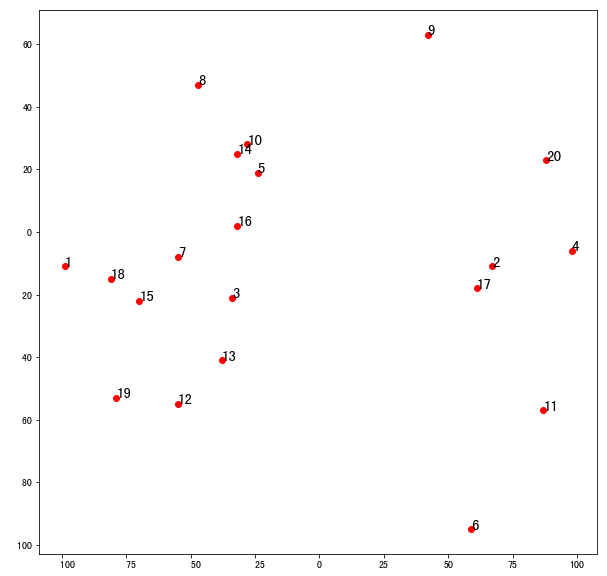

In [166]:
plt.figure(figsize=(10,10))
plt.scatter(latitudes, longitude, color = 'red')

for index, dot in enumerate(dots, start = 1):
    plt.annotate(index, dot, fontsize=15)
plt.show()
# G = nx.Graph()
# G.add_cycle(dict(enumerate(dots)))
# nx.draw(G, dict(enumerate(dots)), node_size=10)

给定一个初始点 𝑃, 以及 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所有的点全部一次，而且所走过的路程最短?

例如：

In [54]:
import math

In [167]:
def get_distance(dot1:tuple, dot2:tuple):
    x = (dot1[0] - dot2[0]) ** 2
    y = (dot1[1] - dot2[1]) ** 2
    return math.sqrt(sum([x, y]))

target_index_list = [start_dot]
def get_shortest_distance(start_dot:tuple, locations:list):
    if not locations:
        return
    
    location = locations[:]
    location.pop(location.index(start_dot))
    temp_dict = dict(enumerate(location))
    s = float('inf')
    temp = 0
    
    for k, v in temp_dict.items():
        s_ = get_distance(start_dot, v)
        if s > s_:
            s = s_
            temp = v
    if temp:        
        target_index_list.append(temp)
    
    return get_shortest_distance(temp, location)

In [168]:
get_shortest_distance(start_dot, dots)

In [169]:
target_index_list

[(-99, -11),
 (-81, -15),
 (-70, -22),
 (-55, -8),
 (-34, -21),
 (-38, -41),
 (-55, -55),
 (-79, -53),
 (-32, 2),
 (-24, 19),
 (-28, 28),
 (-32, 25),
 (-47, 47),
 (42, 63),
 (88, 23),
 (98, -6),
 (67, -11),
 (61, -18),
 (87, -57),
 (59, -95)]

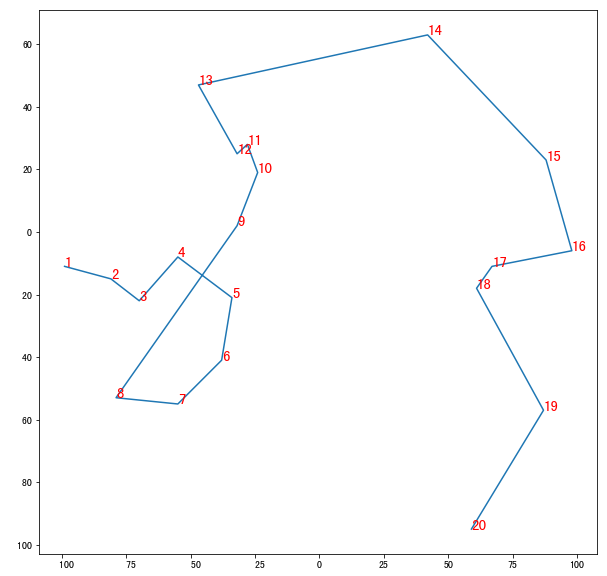

In [170]:
plt.figure(figsize=(10,10))
x = [x[0] for x in target_index_list]
y = [x[1] for x in target_index_list]
for index, dot in enumerate(target_index_list, start=1):
    plt.annotate(index, dot, fontsize=15, color='red')
plt.plot(x, y)
plt.show()

In [171]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

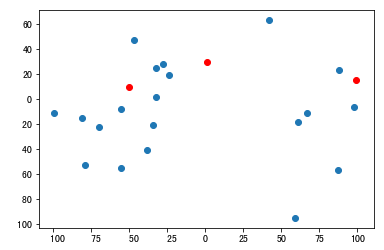

In [172]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')
plt.show()